# Parabolic SAR レビュー用

In [2]:
import sys

path_up = ".."
if not path_up in sys.path:
    sys.path.append(path_up)

In [3]:
import datetime
import os
import time

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd
import yfinance as yf

from funcs.tse import get_ticker_name_list
from module.psar import ParabolicSAR

20250711_4506_parabolic.png


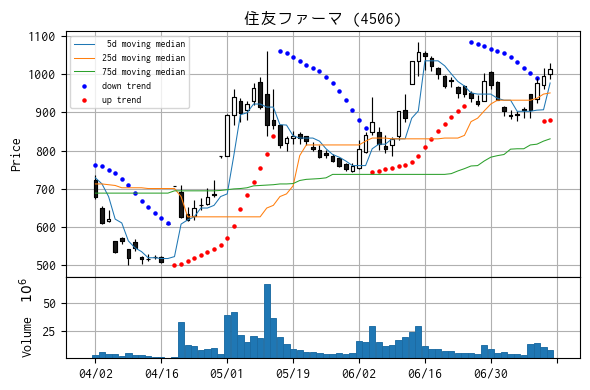

In [8]:
code = '4506'
dict_name = get_ticker_name_list([code])
name = dict_name[code]

symbol = f"{code}.T"
ticker = yf.Ticker(symbol)
df0 = ticker.history(period="3y", interval="1d")
psar = ParabolicSAR()
psar.calc(df0)

# チャート
dt_last = df0.index[len(df0) - 1]
tdelta_1y = datetime.timedelta(days=100)
df = df0[df0.index >= dt_last - tdelta_1y].copy()

FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["font.size"] = 10
fig = plt.figure(figsize=(6, 4))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1, wspace=0.0, hspace=0.0, height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex="col")):
    ax[i] = axis
    ax[i].grid()

mm05 = df0["Close"].rolling(5).median()
mm25 = df0["Close"].rolling(25).median()
mm75 = df0["Close"].rolling(75).median()

apds = [
    mpf.make_addplot(mm05[df.index], width=0.75, label=" 5d moving median", ax=ax[0]),
    mpf.make_addplot(mm25[df.index], width=0.75, label="25d moving median", ax=ax[0]),
    mpf.make_addplot(mm75[df.index], width=0.75, label="75d moving median", ax=ax[0]),
    mpf.make_addplot(df["Bear"], type="scatter", marker="o", markersize=5, color="blue", label="down trend", ax=ax[0]),
    mpf.make_addplot(df["Bull"], type="scatter", marker="o", markersize=5, color="red", label="up trend", ax=ax[0]),
]
mpf.plot(df, type="candle", style="default", volume=ax[1], datetime_format="%m/%d", addplot=apds, xrotation=0, ax=ax[0])
ax[0].set_title(f"{name} ({code})")
ax[0].legend(loc="best", fontsize=7)

plt.tight_layout()
dt = df.tail(1).index[0]
name_chart = f"{dt.year:04d}{dt.month:02d}{dt.day:02d}_{code}_parabolic.png"
print(name_chart)
#plt.savefig(name_chart)
plt.show()
plt.close()